# ASSIGNMENT : Implementation of ANN in Keras



---



# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

# Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('wine.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Q3. Check for null values, identify categorical variables, and encode them.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_y = encoder.fit_transform(df['quality'])

df['quality']= encoded_y

In [ ]:
df[['quality']].head()

,quality
0,0
1,0
2,0
3,1
4,0


# Q4. Separate the features and target variables from the dataset.

In [ ]:
x= df.drop('quality' , axis=1)
y= df['quality']

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

x_train_full , x_test ,y_train_full, y_test = train_test_split(x,y, random_state=42)
x_train ,x_valid , y_train,y_valid = train_test_split(x_train_full, y_train_full , random_state=42)

In [34]:
print (x_train.shape)
print(x_valid.shape)

(899, 11)
(300, 11)


# Q6. Scale the dataset using an appropriate scaling technique.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled= scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [62]:
print(x_train_scaled.shape)
print(x_valid_scaled.shape)
print(y_train.shape)
print(y_valid.shape)


(899, 11)
(300, 11)
(899,)
(300,)


# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [76]:
from tensorflow import keras

layers= [
    tf.keras.layers.Flatten( input_shape= (x_train_scaled.shape[1],), name = 'inputlayer'),
    tf.keras.layers.Dense(50,activation='relu' , name='hiddenlayer1'),
    tf.keras.layers.Dense(10,activation='relu',name= 'hiddenlayer2'),
    tf.keras.layers.Dense(1, activation= 'sigmoid', name='outputlayer')
]

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [77]:
model_classifier = tf.keras.models.Sequential(layers)

# Q9. Print the summary of the model architecture.

In [78]:
model_classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 11)                0         
                                                                 
 hiddenlayer1 (Dense)        (None, 50)                600       
                                                                 
 hiddenlayer2 (Dense)        (None, 10)                510       
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [79]:
loss_function = 'binary_crossentropy'
optimizer = 'adam'
metrics = ('accuracy')



# Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [80]:
model_classifier.compile(optimizer=optimizer , loss= loss_function, metrics= metrics)

# Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [82]:
history= model_classifier.fit( x_train_scaled, y_train , batch_size=15, epochs=35, validation_data=(x_valid_scaled,y_valid))

Epoch 1/35
60/60 [==============================] - 0s 7ms/step - loss: 0.4054 - accuracy: 0.8098 - val_loss: 0.6104 - val_accuracy: 0.7233
Epoch 2/35
60/60 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8220 - val_loss: 0.6156 - val_accuracy: 0.7233
Epoch 3/35
60/60 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.8176 - val_loss: 0.6121 - val_accuracy: 0.7267
Epoch 4/35
60/60 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8131 - val_loss: 0.6137 - val_accuracy: 0.7300
Epoch 5/35
60/60 [==============================] - 0s 5ms/step - loss: 0.4005 - accuracy: 0.8109 - val_loss: 0.6101 - val_accuracy: 0.7300
Epoch 6/35
60/60 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8131 - val_loss: 0.6141 - val_accuracy: 0.7267
Epoch 7/35
60/60 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8187 - val_loss: 0.6126 - val_accuracy: 0.7267
Epoch 8/35
60/60 [==

# Q14. Store the model's training history as a Pandas DataFrame.

In [91]:
df1=pd.DataFrame(history.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.405442,0.809789,0.610429,0.723333
1,0.400991,0.822024,0.615649,0.723333
2,0.400073,0.817575,0.612123,0.726667
3,0.398319,0.813126,0.613663,0.730000
4,0.400463,0.810901,0.610123,0.730000
5,0.396654,0.813126,0.614057,0.726667
6,0.394246,0.818687,0.612614,0.726667
7,0.392943,0.813126,0.619037,0.730000
8,0.393326,0.813126,0.619565,0.720000
9,0.392486,0.826474,0.617311,0.730000


# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: xlabel='loss'>

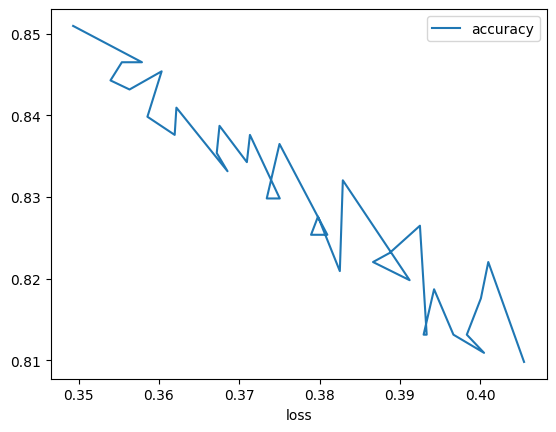

In [101]:


df1.plot("loss", "accuracy")


<Axes: >

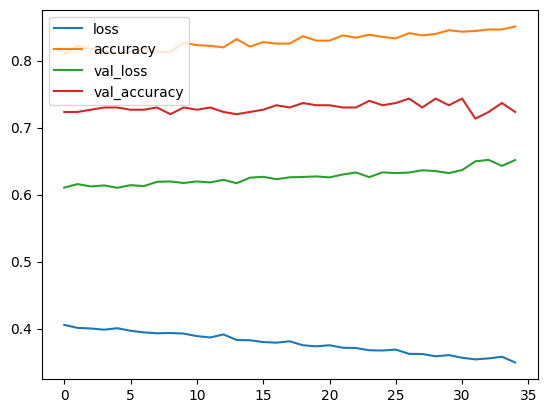

In [102]:
df1.plot()

# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [110]:
model_classifier.evaluate(x_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 16.3692 - accuracy: 0.4675


[16.369220733642578, 0.4675000011920929]